### Packages

In [1]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Package to manipulate array and matrix
import matplotlib.pyplot as plt # Package to create figures and plots
import math # Package to be able to do some mathematical operations
import ReguLabFct as rlf # Package useful for the laboratory of regulation of HELMo Gramme
from ipywidgets import interact, FloatSlider, HBox, FloatText # Funtions useful for adding interactivity in the generated figures

# Pzmap, classe, ordre et courbes théoriques

## Diagramme de Nichols : classe et ordre

Chaque pôle déphase de 90 ° : 

	1 pôle : -90° = ordre 1

	2 pôles : -180° = ordre 2
	
	3 pôles : -270° = ordre 3

Classe 0 : G -> 0 = pas de pôle à l’origine 

Classe 1 : G -> ∞ en -90°

Classe 2 : G -> ∞ en -180°

ici, ordre 3 et classe 0 
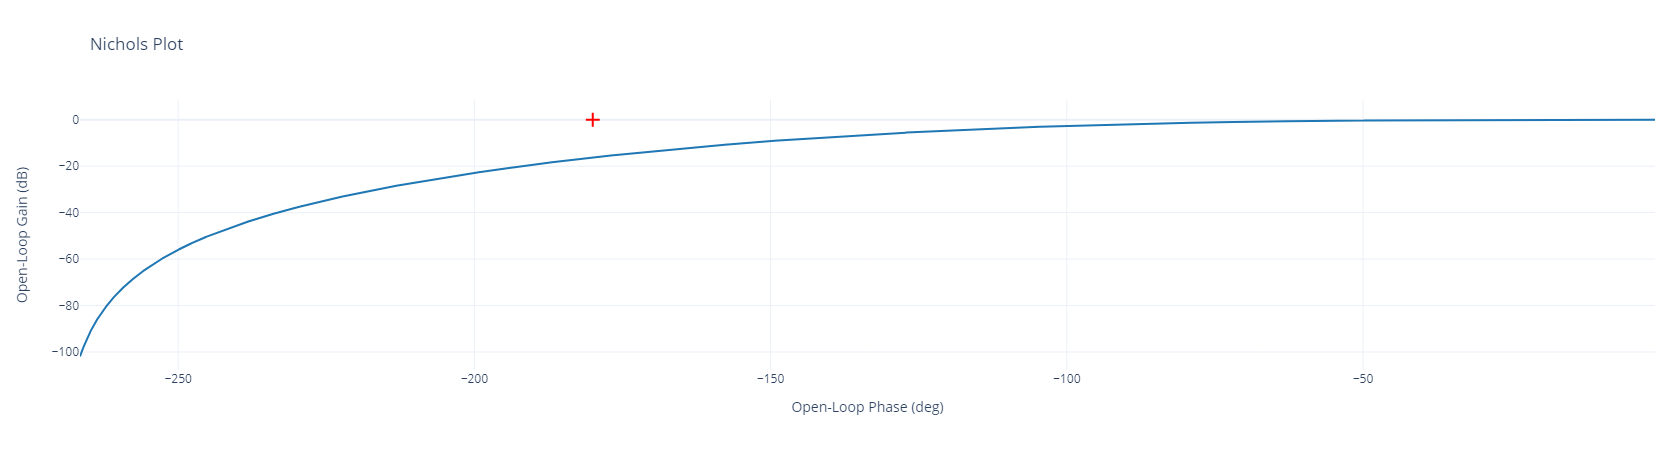

## Pzmap : ordre et classe : 

Ordre minimum = nombre de pôles présents (tous les pts) : pôles + zéros

Classe maximum : nbr de pôles à l'origine (zéro réel)

## Courbes théoriques avec modif de $Z$

$\zeta$ <-1 : 2 réels positifs (instable)     

$\zeta$  = -1 : 1 réel positif en 1. 

0 > $\zeta$ >-1 : complexes conjugués de réels > 0 

$\zeta$ = 0 : complexes conjugués de réel nul 

1 > $\zeta$ > 0 : complexes conjugués de réels < 0 

$\zeta$ = 1 : suramorti (plus de D%) et 1 pôle réel <0 


$\zeta$ > 1 : suramorti (plus de D%) et 2 pôles réels <0


### Réponse indicielle et PzMap

In [2]:
K = 1
wn = 1

def zeta_pzmap(zeta): 
    H = ml.tf(K, [1/wn**2, 2*zeta/wn, 1])  # Calcul de la fonction de transfert
    fig1 = plt.figure()
    fig1.set_visible(False)
    ml.pzmap(H);
    fig2 = plt.figure()
    fig2.set_visible(False)
    rlf.stepWithInfo(H);
    fig1.set_visible(True)
    fig2.set_visible(True)
interact(zeta_pzmap, zeta=(-2.5, 2.5, 0.05))

interactive(children=(FloatSlider(value=0.0, description='zeta', max=2.5, min=-2.5, step=0.05), Output()), _do…

<function __main__.zeta_pzmap(zeta)>

A gauche mais proche de l'axe réel : oscille énormément

Plus les pôles s'éloignent de l'axe réel, moins ça oscille.

1 pôle réel <0 : suramorti

### Pzmap et Nichols

In [3]:
# Diagramme de Nichols

# Initial transfert function
zeta_init = 0.5
K_init = 1
wn_init = 1
G_init = ml.tf(
    [K_init], [1 / wn_init**2, 2 * zeta_init / wn_init, 1]
)  # Transfert function
G_BF_init = ml.feedback(G_init)

# Creation of the interactive figures
fig_nyquist = rlf.nichols2([G_init, G_init])
step_fig, yout, t = rlf.step2([G_BF_init, G_BF_init], data=True)

# Function called by the slider widgets
def plot_nyquist(K, zeta, wn):
    G = ml.tf([K], [1 / wn**2, 2 * zeta / wn, 1])
    G_BF = ml.feedback(G)
    rlf.nichols2([G_init, G], fig=fig_nyquist)
    rlf.step2([G_BF_init, G_BF], fig=step_fig)
    ml.pzmap(G);


# Interactive slider widgets to adjust the parameters of the transfert function
slider_zeta = FloatSlider(min=-2, max=2, step=0.1, value=zeta_init)
slider_wn = FloatSlider(min=0.00000001, max=5, step=0.1, value=1)
slider_K = FloatSlider(min=-5, max=5, step=0.5, value=1)
interact(plot_nyquist, K=slider_K, zeta=slider_zeta, wn=slider_wn)

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([fig_nyquist, step_fig]))

interactive(children=(FloatSlider(value=1.0, description='K', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

    'data': [{'hovertemplate': ('<b>w</b>: %{text:.3f} rad/s<br' ... '<b>phase</…

### Réponse indicielle et Nyquist

In [9]:
# Diagramme de Nichols

# Initial transfert function
zeta_init = 0.7
K_init = 3.5
wn_init = 1
G_init = ml.tf(
    [K_init], [1 / wn_init**2, 2 * zeta_init / wn_init, 1]
)  # Transfert function
G_BF_init = ml.feedback(G_init)

# Creation of the interactive figures
fig_nyquist = rlf.nyquist2([G_init, G_init])
step_fig, yout, t = rlf.step2([G_BF_init, G_BF_init], data=True)

# Function called by the slider widgets
def plot_nyquist(K, zeta, wn):
    G = ml.tf([K], [1 / wn**2, 2 * zeta / wn, 1])
    G_BF = ml.feedback(G)
    rlf.nyquist2([G_init, G], fig=fig_nyquist)
    rlf.step2([G_BF_init, G_BF], fig=step_fig)


# Interactive slider widgets to adjust the parameters of the transfert function
slider_zeta = FloatSlider(min=-2, max=2, step=0.1, value=zeta_init)
slider_wn = FloatSlider(min=0.00000001, max=5, step=0.1, value=1)
slider_K = FloatSlider(min=-5, max=5, step=0.5, value=1)
interact(plot_nyquist, K=slider_K, zeta=slider_zeta, wn=slider_wn)

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([fig_nyquist, step_fig]))

interactive(children=(FloatSlider(value=1.0, description='K', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

    'data': [{'customdata': [[3.5000069825208953, -0.8021687191971422],
        …

### Réponse indicielle et Nichols

In [10]:
# Diagramme de Nichols

# Initial transfert function
zeta_init = 0.5
K_init = 1
wn_init = 1
G_init = ml.tf(
    [K_init], [1 / wn_init**2, 2 * zeta_init / wn_init, 1]
)  # Transfert function
G_BF_init = ml.feedback(G_init)

# Creation of the interactive figures
nichols_fig = rlf.nichols2([G_init, G_init])
step_fig, yout, t = rlf.step2([G_BF_init, G_BF_init], data=True)

# Function called by the slider widgets
def plot_nichols(K, zeta, wn):
    G = ml.tf([K], [1 / wn**2, 2 * zeta / wn, 1])
    G_BF = ml.feedback(G)
    rlf.nichols2([G_init, G], fig=nichols_fig)
    rlf.step2([G_BF_init, G_BF], fig=step_fig)


# Interactive slider widgets to adjust the parameters of the transfert function
slider_zeta = FloatSlider(min=-2, max=2, step=0.1, value=zeta_init)
slider_wn = FloatSlider(min=0.00000001, max=5, step=0.1, value=1)
slider_K = FloatSlider(min=-5, max=5, step=0.5, value=1)
interact(plot_nichols, K=slider_K, zeta=slider_zeta, wn=slider_wn)

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([nichols_fig, step_fig]))

interactive(children=(FloatSlider(value=1.0, description='K', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

    'data': [{'hovertemplate': ('<b>w</b>: %{text:.3f} rad/s<br' ... '<b>phase</…

### Réponse indicielle et Bode

In [11]:
# Diagramme de Bode

# Initial transfert function
zeta_init = 0.5
K_init = 1
wn_init = 1
G_init = ml.tf(
    [K_init], [1 / wn_init**2, 2 * zeta_init / wn_init, 1]
)  # Transfert function
G_BF_init = ml.feedback(G_init)

# Creation of the interactive figures
bode_fig = rlf.bode2([G_init, G_init])
step_fig, yout, t = rlf.step2([G_BF_init, G_BF_init], data=True)

# Function called by the slider widgets
def plot_bode(K, zeta, wn):
    G = ml.tf([K], [1 / wn**2, 2 * zeta / wn, 1])
    G_BF = ml.feedback(G)
    rlf.bode2([G_init, G], fig=bode_fig)
    rlf.step2([G_BF_init, G_BF], fig=step_fig)

# Interactive slider widgets to adjust the parameters of the transfert function
slider_zeta = FloatSlider(min=-2, max=2, step=0.1, value=zeta_init)
slider_wn = FloatSlider(min=0.00000001, max=5, step=0.1, value=1)
slider_K = FloatSlider(min=-5, max=5, step=0.5, value=1)
interact(plot_bode, K=slider_K, zeta=slider_zeta, wn=slider_wn)

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([bode_fig, step_fig]))

interactive(children=(FloatSlider(value=1.0, description='K', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

    'data': [{'hovertemplate': ('<b>w</b>: %{x:.3f} rad/s<br><b' ... 'phase</b>:…